<Figure size 1500x1500 with 0 Axes>

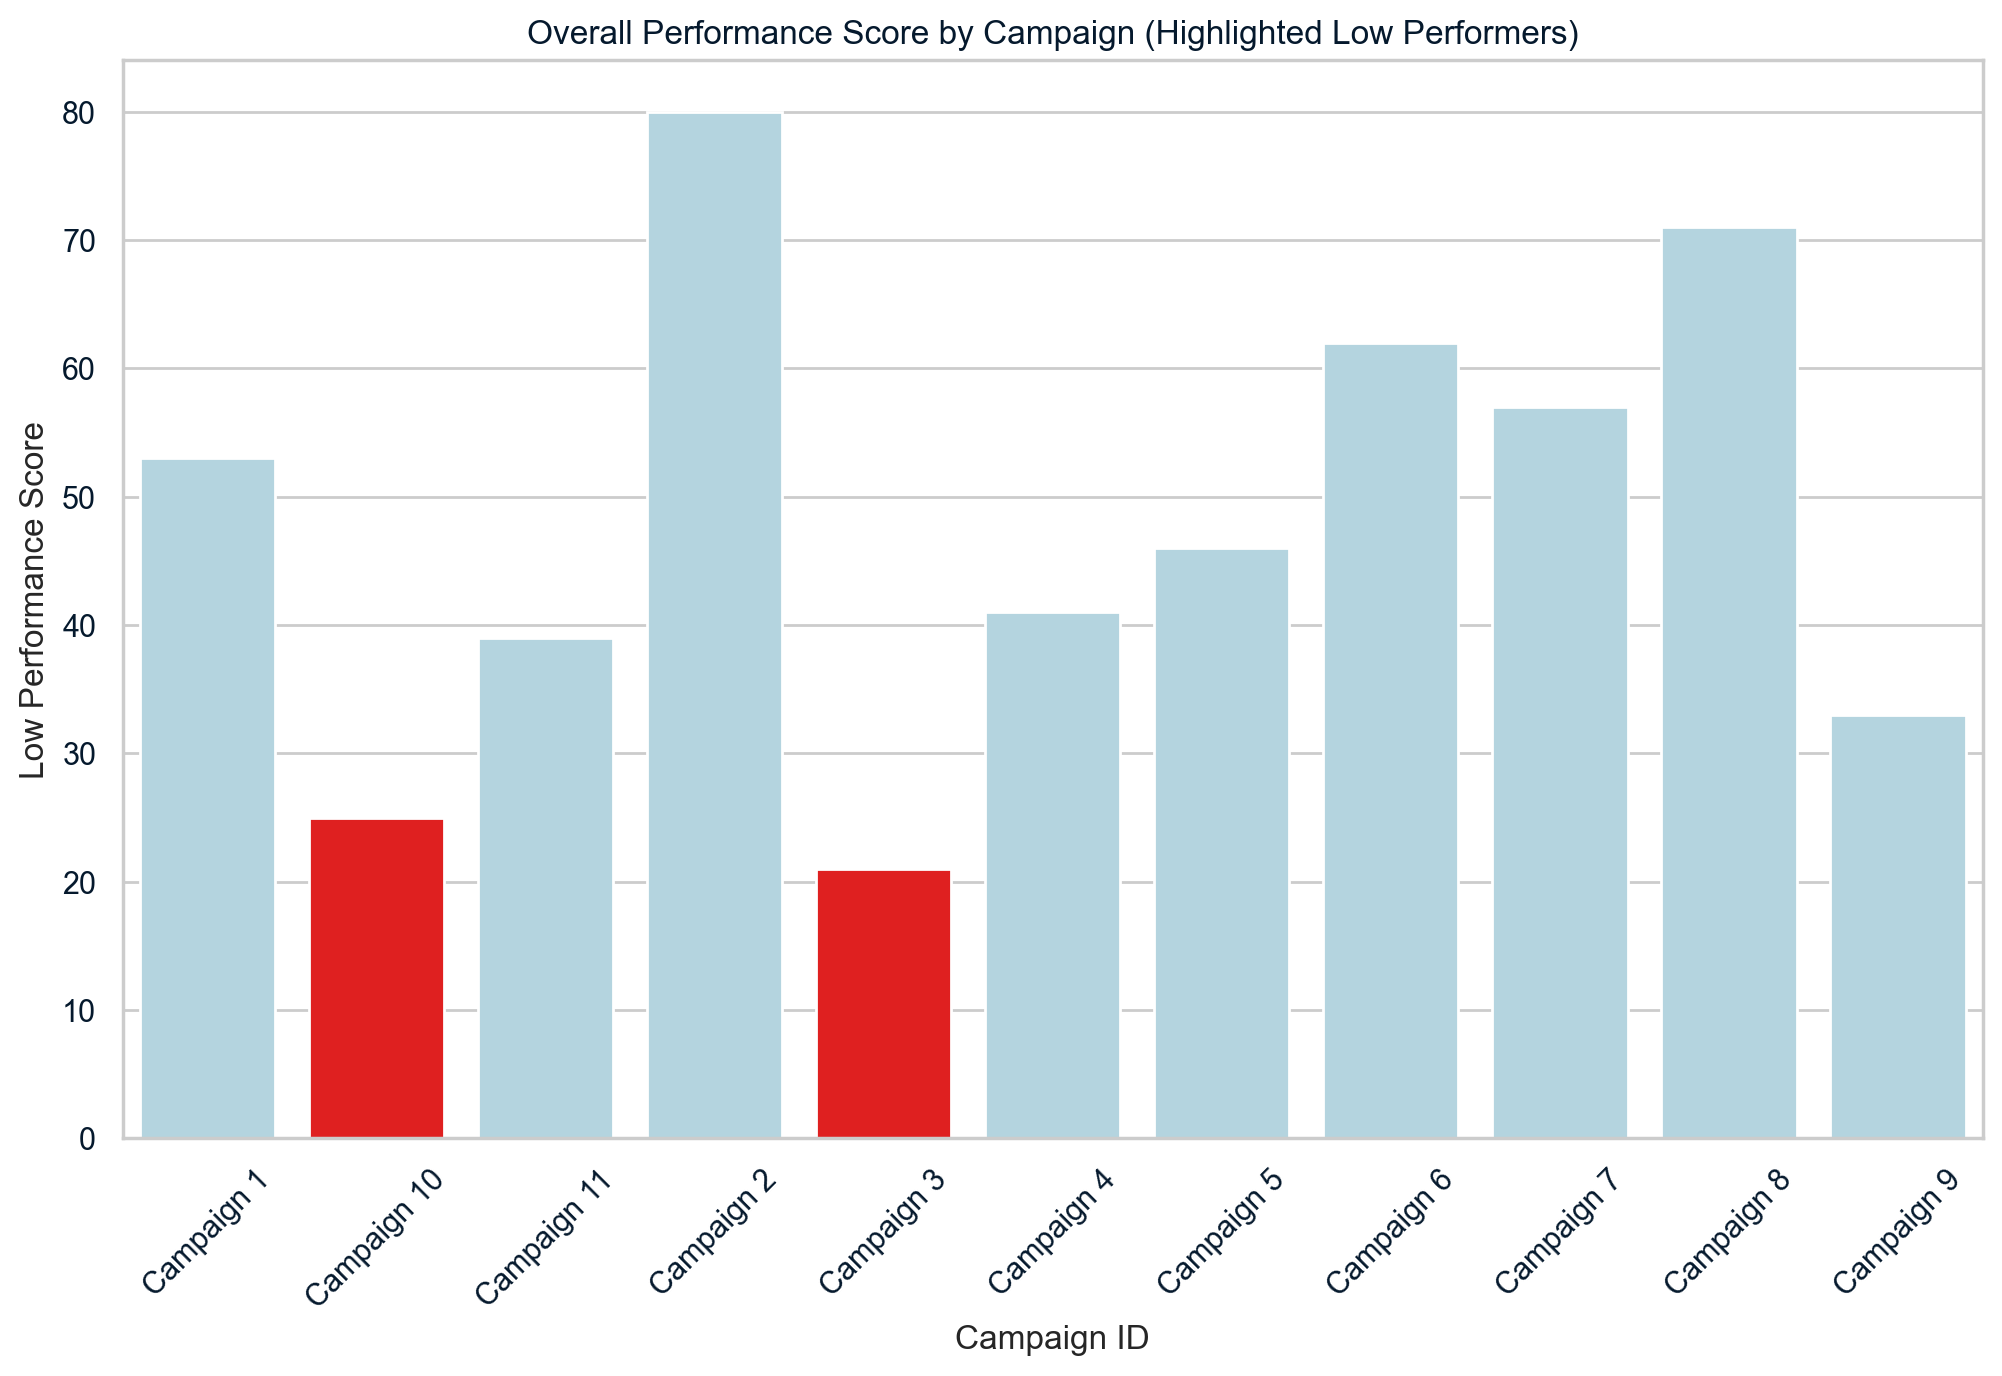

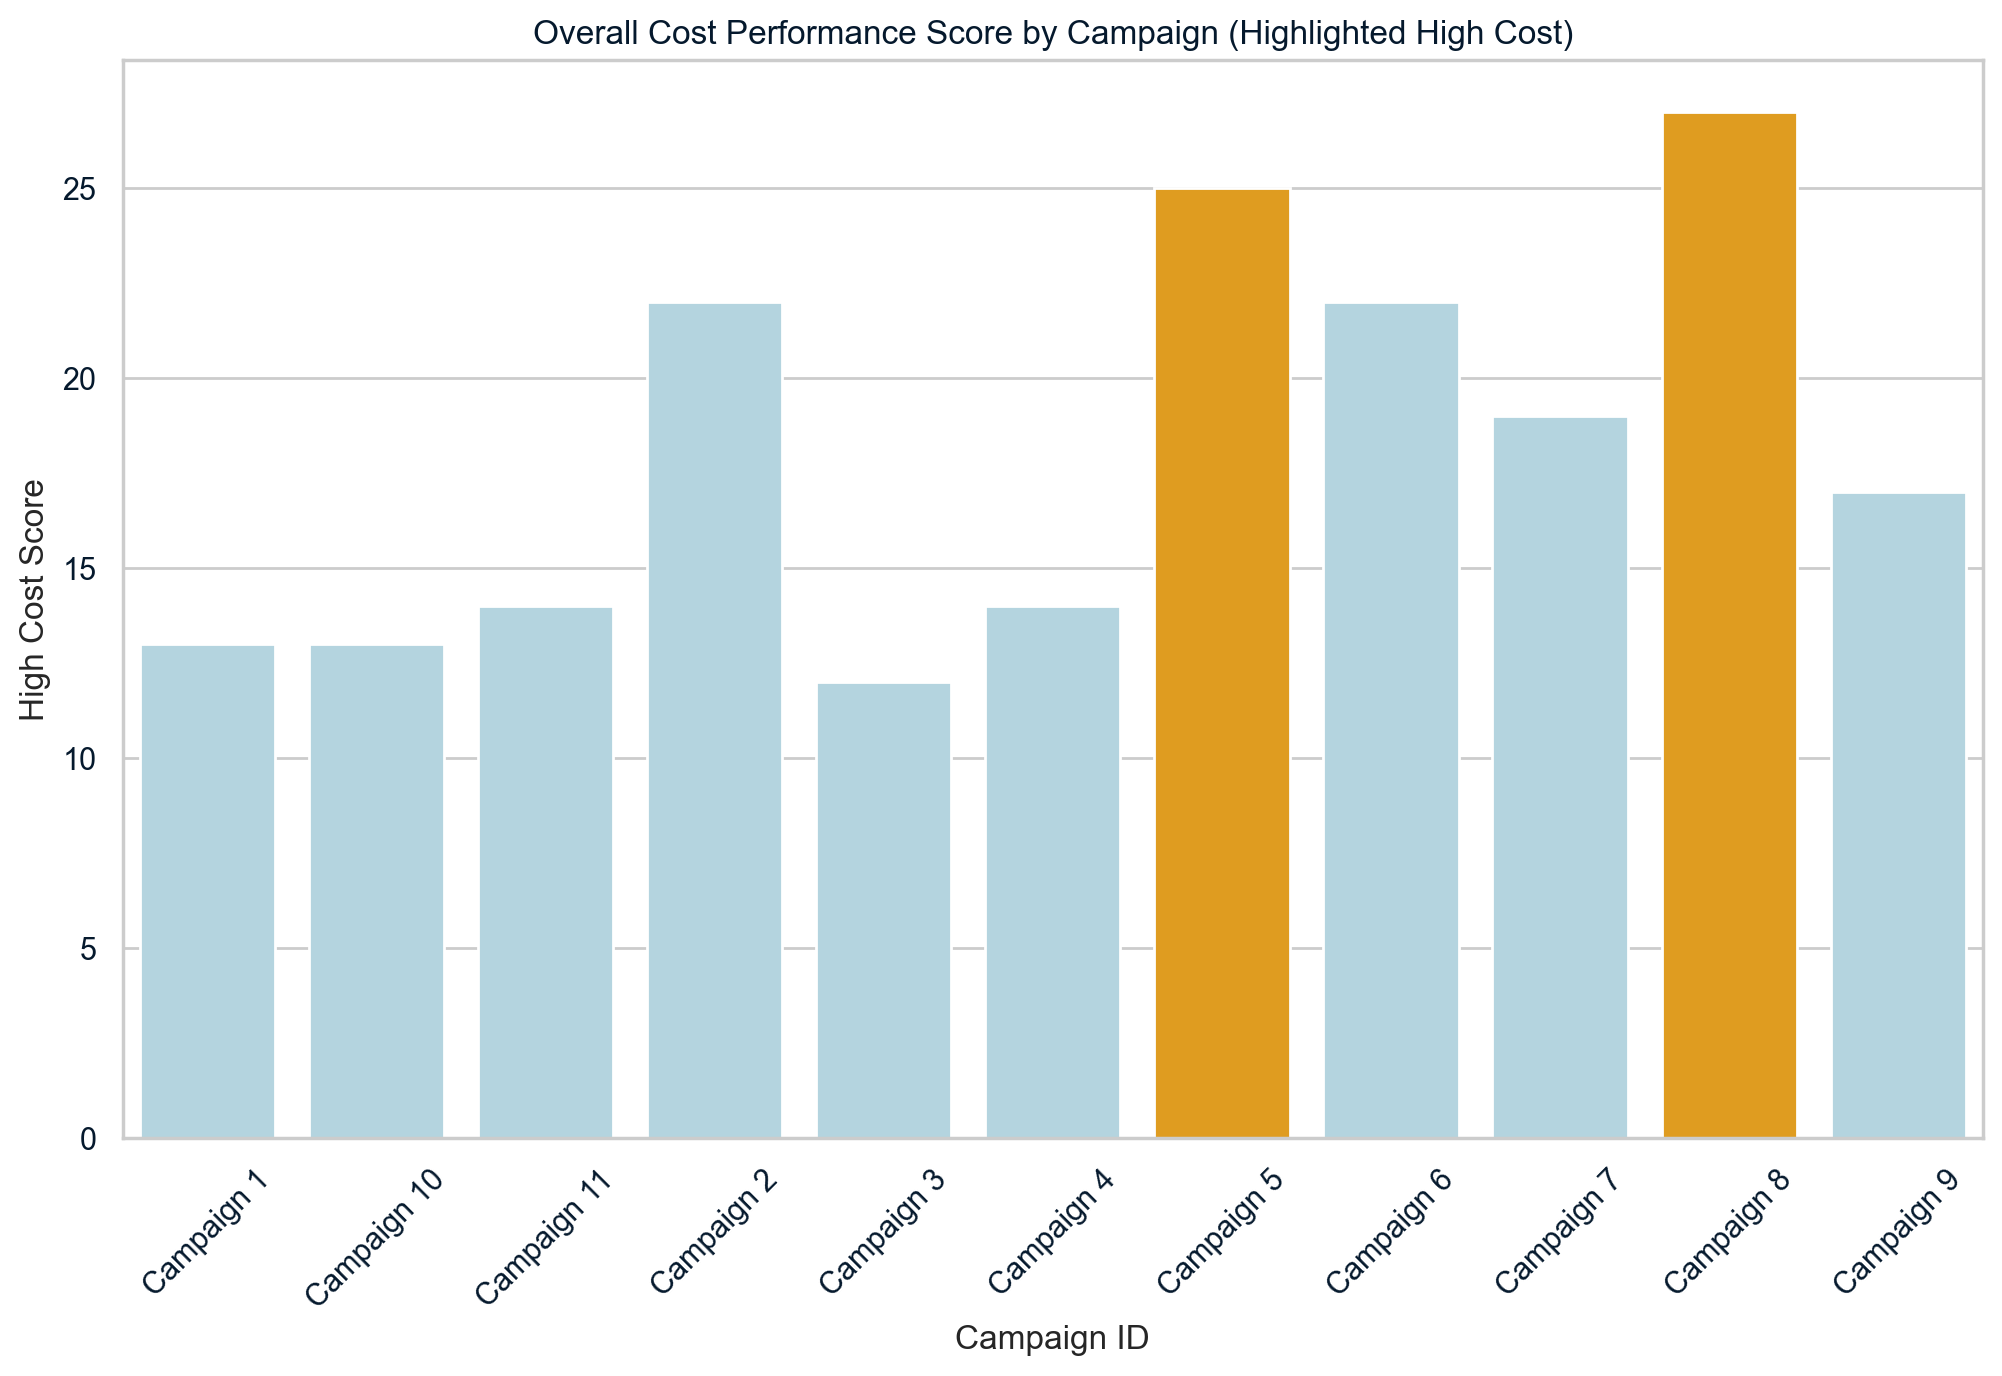

Overall Campaign Ranking:
    campaign ID  Low_Performance_Score  High_Cost_Score
4    Campaign 3                   21.0             12.0
1   Campaign 10                   25.0             13.0
10   Campaign 9                   33.0             17.0
2   Campaign 11                   39.0             14.0
5    Campaign 4                   41.0             14.0
6    Campaign 5                   46.0             25.0
0    Campaign 1                   53.0             13.0
8    Campaign 7                   57.0             19.0
7    Campaign 6                   62.0             22.0
9    Campaign 8                   71.0             27.0
3    Campaign 2                   80.0             22.0
Campaigns Ranked by Combined Low Performance and High Cost Scores:
    campaign ID  Composite_Score  Composite_Rank
4    Campaign 3             33.0             1.0
1   Campaign 10             38.0             2.0
10   Campaign 9             50.0             3.0
2   Campaign 11             53.0       

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'marketing_data_fb.xlsx'
xlsx = pd.ExcelFile(file_path)

df = pd.read_excel(xlsx, 'Revised Cleaned Data')

campaign_data = df.groupby('campaign ID').agg({
    'Reach': 'sum',
    'Impressions': 'sum',
    'Frequency': 'mean',
    'Clicks': 'sum',
    'Unique Clicks': 'sum',
    'Unique Link Clicks (ULC)': 'sum',
    'Click-Through Rate (CTR)': 'mean',
    'Unique Click-Through Rate (Unique CTR)': 'mean',
    'Cost Per Click (CPC)': 'mean',
    'Cost per Result (CPR)': 'mean',
    'Amount Spent in INR': 'sum',
}).reset_index()

campaign_data['Rank_Reach'] = campaign_data['Reach'].rank(ascending=True)
campaign_data['Rank_Clicks'] = campaign_data['Clicks'].rank(ascending=True)
campaign_data['Rank_Impressions'] = campaign_data['Impressions'].rank(ascending=True)
campaign_data['Rank_Frequency'] = campaign_data['Frequency'].rank(ascending=True)
campaign_data['Rank_Unique_Clicks'] = campaign_data['Unique Clicks'].rank(ascending=True)
campaign_data['Rank_ULC'] = campaign_data['Unique Link Clicks (ULC)'].rank(ascending=True)
campaign_data['Rank_CTR'] = campaign_data['Click-Through Rate (CTR)'].rank(ascending=True)
campaign_data['Rank_Unique_CTR'] = campaign_data['Unique Click-Through Rate (Unique CTR)'].rank(ascending=True)
campaign_data['Rank_CPC'] = campaign_data['Cost Per Click (CPC)'].rank(ascending=False)
campaign_data['Rank_CPR'] = campaign_data['Cost per Result (CPR)'].rank(ascending=False)
campaign_data['Rank_Amount_Spent'] = campaign_data['Amount Spent in INR'].rank(ascending=False)

campaign_data['Low_Performance_Score'] = (
    campaign_data[['Rank_CTR', 'Rank_Unique_CTR', 'Rank_Reach', 'Rank_Clicks', 'Rank_Impressions', 'Rank_Frequency', 'Rank_Unique_Clicks', 'Rank_ULC']].sum(axis=1)
)

campaign_data['High_Cost_Score'] = (
    campaign_data[['Rank_CPC', 'Rank_CPR', 'Rank_Amount_Spent']].sum(axis=1)
)

low_performance_campaigns = campaign_data.sort_values(by='Low_Performance_Score').head(2)
high_cost_campaigns = campaign_data.sort_values(by='High_Cost_Score', ascending=False).head(2)

sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

plt.figure(figsize=(12, 7))
palette = ['lightblue' if (x not in low_performance_campaigns['campaign ID'].values) else 'red' for x in campaign_data['campaign ID']]
sns.barplot(x='campaign ID', y='Low_Performance_Score', data=campaign_data, palette=palette)
plt.title('Overall Performance Score by Campaign (Highlighted Low Performers)')
plt.xlabel('Campaign ID')
plt.ylabel('Low Performance Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 7))
palette = ['lightblue' if (x not in high_cost_campaigns['campaign ID'].values) else 'orange' for x in campaign_data['campaign ID']]
sns.barplot(x='campaign ID', y='High_Cost_Score', data=campaign_data, palette=palette)
plt.title('Overall Cost Performance Score by Campaign (Highlighted High Cost)')
plt.xlabel('Campaign ID')
plt.ylabel('High Cost Score')
plt.xticks(rotation=45)
plt.show()

print("Overall Campaign Ranking:")
print(campaign_data[['campaign ID', 'Low_Performance_Score', 'High_Cost_Score']].sort_values(by=['Low_Performance_Score', 'High_Cost_Score'], ascending=[True, False]))

campaign_data['Composite_Score'] = campaign_data['Low_Performance_Score'] + campaign_data['High_Cost_Score']

campaign_data['Composite_Rank'] = campaign_data['Composite_Score'].rank(ascending=True)

print("Campaigns Ranked by Combined Low Performance and High Cost Scores:")
print(campaign_data[['campaign ID', 'Composite_Score', 'Composite_Rank']].sort_values(by='Composite_Rank'))

top_2_low_performing_high_cost_campaigns = campaign_data.sort_values(by='Composite_Score').head(2)
print("\nTop 2 Low-Performing and High-Cost Campaigns:")
print(top_2_low_performing_high_cost_campaigns[['campaign ID', 'Composite_Score']])